In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Smote

In [30]:
df=pd.read_csv('/content/drive/Shared drives/머신러닝1조/SMOTE_df.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0.0,0.263808,-1.544820,-0.046054,0.244218,0.202195,-0.087396,-0.005293,-0.170222,-0.007409,0.116615,-0.059197,-0.119770,0.204765,0.024195,0.177926,0.240359,0.004551,0.151017,0.004153,-0.042467,-0.384347,0.168219,0.075298
1,0,1.0,-0.032654,-1.733508,-0.235535,0.486232,0.658361,-0.219277,-0.166978,-0.217703,-0.006757,0.056607,0.200599,0.155480,-0.342715,0.332548,0.134688,-0.280812,-0.288733,0.186474,0.009803,-0.221372,0.069559,-0.063922,-0.080326
2,0,2.0,2.154565,-0.538834,-0.268986,-0.505918,-1.401629,-0.212587,0.516820,-0.189022,0.264098,-0.381455,0.207798,0.531892,-0.863042,-0.792266,0.308422,-0.009915,-0.156920,0.158106,0.306290,0.212993,0.463049,0.221446,0.126620
3,0,3.0,-0.723291,-0.879523,-0.184342,0.368483,0.317115,-0.322722,-0.215868,-0.311842,0.258970,-0.168589,0.239832,-0.038986,-0.180350,0.181414,-0.007932,-0.148883,-0.044905,0.058275,-0.123224,-0.063060,-0.021972,0.003012,0.021188
4,0,4.0,-1.348403,0.365901,-0.005297,-0.022092,0.037480,-0.262842,0.525057,-0.569513,0.165457,-0.052903,0.419788,0.003937,-0.269897,0.010500,0.301891,-0.037740,0.022121,0.339503,-0.200124,-0.333094,-0.287733,0.116748,0.072359


In [3]:
X=df.drop(['Unnamed: 0', '0'], axis=1)
y=df.loc[:, 'Unnamed: 0']
X.shape

(111868, 23)

In [4]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.971
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11292
           1       0.96      0.98      0.97     11082

    accuracy                           0.97     22374
   macro avg       0.97      0.97      0.97     22374
weighted avg       0.97      0.97      0.97     22374



,tn,fp,fn,tp
0,10883,409,236,10846


0    122090
dtype: int64


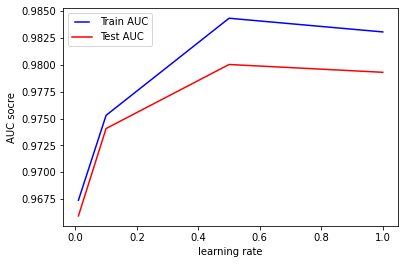

In [20]:
learning_rates = [1, 0.5, 0.1, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('learning rate')
plt.show()

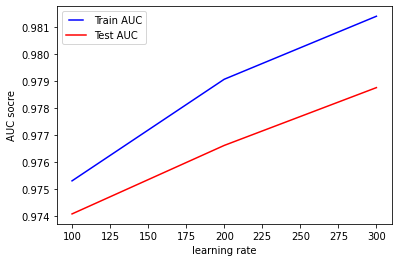

In [22]:
n_estimators = [100, 200, 300]
train_results = []
test_results = []
for eta in n_estimators:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('learning rate')
plt.show()

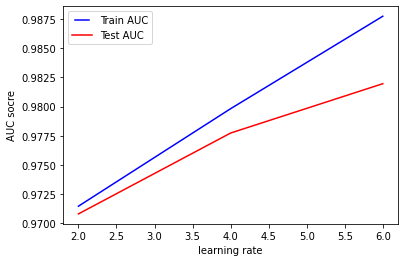

In [23]:
max_depth = [2, 4, 6]
train_results = []
test_results = []
for eta in max_depth:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('learning rate')
plt.show()

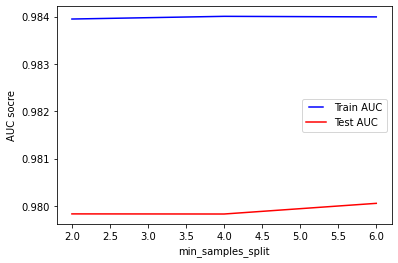

In [26]:
min_samples_split = [2, 4, 6]
train_results = []
test_results = []
for eta in min_samples_split:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_samples_split=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_split')
plt.show()

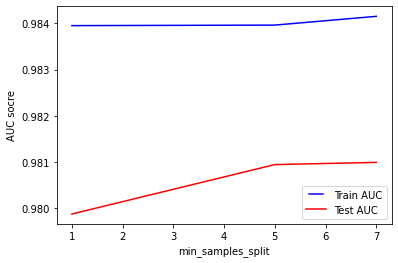

In [27]:
min_samples_leaf = [1, 5, 7]
train_results = []
test_results = []
for eta in min_samples_leaf:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_samples_split=2,
                                      min_samples_leaf=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_split')
plt.show()

In [28]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_depth=4, 
                                 min_samples_split=2, min_samples_leaf=5, random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.981
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11292
           1       0.97      0.99      0.98     11082

    accuracy                           0.98     22374
   macro avg       0.98      0.98      0.98     22374
weighted avg       0.98      0.98      0.98     22374



,tn,fp,fn,tp
0,10988,304,124,10958


0    65040
dtype: int64


# Adasyn

In [31]:
df=pd.read_csv('/content/drive/Shared drives/머신러닝1조/ADASYN_df.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0.0,0.263808,-1.544820,-0.046054,0.244218,0.202195,-0.087396,-0.005293,-0.170222,-0.007409,0.116615,-0.059197,-0.119770,0.204765,0.024195,0.177926,0.240359,0.004551,0.151017,0.004153,-0.042467,-0.384347,0.168219,0.075298
1,0,1.0,-0.032654,-1.733508,-0.235535,0.486232,0.658361,-0.219277,-0.166978,-0.217703,-0.006757,0.056607,0.200599,0.155480,-0.342715,0.332548,0.134688,-0.280812,-0.288733,0.186474,0.009803,-0.221372,0.069559,-0.063922,-0.080326
2,0,2.0,2.154565,-0.538834,-0.268986,-0.505918,-1.401629,-0.212587,0.516820,-0.189022,0.264098,-0.381455,0.207798,0.531892,-0.863042,-0.792266,0.308422,-0.009915,-0.156920,0.158106,0.306290,0.212993,0.463049,0.221446,0.126620
3,0,3.0,-0.723291,-0.879523,-0.184342,0.368483,0.317115,-0.322722,-0.215868,-0.311842,0.258970,-0.168589,0.239832,-0.038986,-0.180350,0.181414,-0.007932,-0.148883,-0.044905,0.058275,-0.123224,-0.063060,-0.021972,0.003012,0.021188
4,0,4.0,-1.348403,0.365901,-0.005297,-0.022092,0.037480,-0.262842,0.525057,-0.569513,0.165457,-0.052903,0.419788,0.003937,-0.269897,0.010500,0.301891,-0.037740,0.022121,0.339503,-0.200124,-0.333094,-0.287733,0.116748,0.072359


In [32]:
X=df.drop(['Unnamed: 0', '0'], axis=1)
y=df.loc[:, 'Unnamed: 0']
X.shape

(111865, 23)

In [33]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.971
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11355
           1       0.96      0.98      0.97     11018

    accuracy                           0.97     22373
   macro avg       0.97      0.97      0.97     22373
weighted avg       0.97      0.97      0.97     22373



,tn,fp,fn,tp
0,10927,428,213,10805


0    110780
dtype: int64


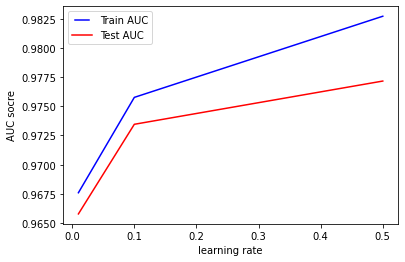

In [35]:
learning_rates = [0.5, 0.1, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('learning rate')
plt.show()

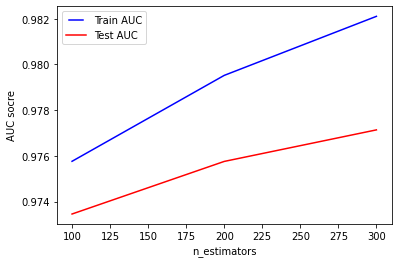

In [36]:
n_estimators = [100, 200, 300]
train_results = []
test_results = []
for eta in n_estimators:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('n_estimators')
plt.show()

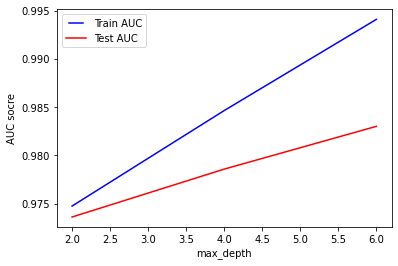

In [37]:
max_depth = [2, 4, 6]
train_results = []
test_results = []
for eta in max_depth:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('max_depth')
plt.show()

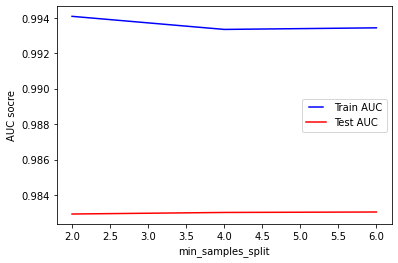

In [38]:
min_samples_split = [2, 4, 6]
train_results = []
test_results = []
for eta in min_samples_split:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=6, min_samples_split=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_split')
plt.show()

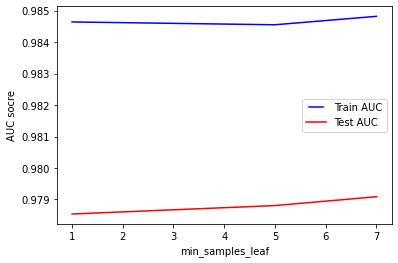

In [40]:
min_samples_leaf = [1, 5, 7]
train_results = []
test_results = []
for eta in min_samples_leaf:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_samples_split=2,
                                      min_samples_leaf=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_leaf')
plt.show()

In [43]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,max_depth=4, min_samples_split=2, min_samples_leaf=7, random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.979
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11355
           1       0.97      0.99      0.98     11018

    accuracy                           0.98     22373
   macro avg       0.98      0.98      0.98     22373
weighted avg       0.98      0.98      0.98     22373



,tn,fp,fn,tp
0,11014,341,130,10888


0    68410
dtype: int64


## Borderline-Smote

In [45]:
df=pd.read_csv('/content/drive/Shared drives/머신러닝1조/borderlineSMOTE_df.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0.0,0.263808,-1.544820,-0.046054,0.244218,0.202195,-0.087396,-0.005293,-0.170222,-0.007409,0.116615,-0.059197,-0.119770,0.204765,0.024195,0.177926,0.240359,0.004551,0.151017,0.004153,-0.042467,-0.384347,0.168219,0.075298
1,0,1.0,-0.032654,-1.733508,-0.235535,0.486232,0.658361,-0.219277,-0.166978,-0.217703,-0.006757,0.056607,0.200599,0.155480,-0.342715,0.332548,0.134688,-0.280812,-0.288733,0.186474,0.009803,-0.221372,0.069559,-0.063922,-0.080326
2,0,2.0,2.154565,-0.538834,-0.268986,-0.505918,-1.401629,-0.212587,0.516820,-0.189022,0.264098,-0.381455,0.207798,0.531892,-0.863042,-0.792266,0.308422,-0.009915,-0.156920,0.158106,0.306290,0.212993,0.463049,0.221446,0.126620
3,0,3.0,-0.723291,-0.879523,-0.184342,0.368483,0.317115,-0.322722,-0.215868,-0.311842,0.258970,-0.168589,0.239832,-0.038986,-0.180350,0.181414,-0.007932,-0.148883,-0.044905,0.058275,-0.123224,-0.063060,-0.021972,0.003012,0.021188
4,0,4.0,-1.348403,0.365901,-0.005297,-0.022092,0.037480,-0.262842,0.525057,-0.569513,0.165457,-0.052903,0.419788,0.003937,-0.269897,0.010500,0.301891,-0.037740,0.022121,0.339503,-0.200124,-0.333094,-0.287733,0.116748,0.072359


In [46]:
X=df.drop(['Unnamed: 0', '0'], axis=1)
y=df.loc[:, 'Unnamed: 0']
X.shape

(111868, 23)

In [47]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.978
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11292
           1       0.97      0.98      0.98     11082

    accuracy                           0.98     22374
   macro avg       0.98      0.98      0.98     22374
weighted avg       0.98      0.98      0.98     22374



,tn,fp,fn,tp
0,10976,316,173,10909


0    89660
dtype: int64


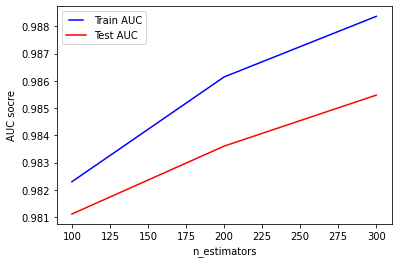

In [49]:
n_estimators = [100, 200, 300]
train_results = []
test_results = []
for eta in n_estimators:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
max_depth = [2, 4, 6]
train_results = []
test_results = []
for eta in max_depth:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('max_depth')
plt.show()

In [ ]:
min_samples_split = [2, 4, 6]
train_results = []
test_results = []
for eta in min_samples_split:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=6, min_samples_split=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_split')
plt.show()

In [ ]:
min_samples_leaf = [1, 5, 7]
train_results = []
test_results = []
for eta in min_samples_leaf:
   model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_samples_split=2,
                                      min_samples_leaf=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_val)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC socre')
plt.xlabel('min_samples_leaf')
plt.show()

In [55]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=4, min_samples_split=2, min_samples_leaf=5, random_state=1)
gbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbm.score(X_val, y_val)))
pred=gbm.predict(X_val)
print(classification_report(y_val, pred))

cm = confusion_matrix(y_val, pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
display(cm)

total_cost = 10*cm.fp + 500*cm.fn
print(total_cost)

Accuracy of the GBM on test set: 0.984
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11292
           1       0.98      0.99      0.98     11082

    accuracy                           0.98     22374
   macro avg       0.98      0.98      0.98     22374
weighted avg       0.98      0.98      0.98     22374



,tn,fp,fn,tp
0,11043,249,106,10976


0    55490
dtype: int64
